In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def preview_dataset(dataset, num_images=8):
    """
    Displays a grid of images with their class labels.

    Args:
    - dataset: The dataset to preview, e.g., train_dataset.
    - num_images: Number of images to display (default is 8).
    """
    loader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    data_iter = iter(loader)
    images, labels = next(data_iter)
    images = images * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1)
    images = images + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    images = torch.clamp(images, 0, 1)

    # Plot images in a grid
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        ax = plt.subplot(2, num_images // 2, i + 1)
        np_img = images[i].numpy().transpose((1, 2, 0))  # Convert from Tensor to NumPy array
        plt.imshow(np_img)
        plt.title(dataset.classes[labels[i].item()])
        plt.axis("off")
    plt.show()

In [3]:
num_epochs = 50
batch_size = 512
print(batch_size)
learning_rate = 0.001
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

512


In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet standard input size
    transforms.ToTensor(),
    transforms.RandomInvert(0.8),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # ImageNet stats
])
train_dataset = datasets.ImageFolder(root="/home/hbdesk/labelstudio_convert/pixel_filter_dataset/", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

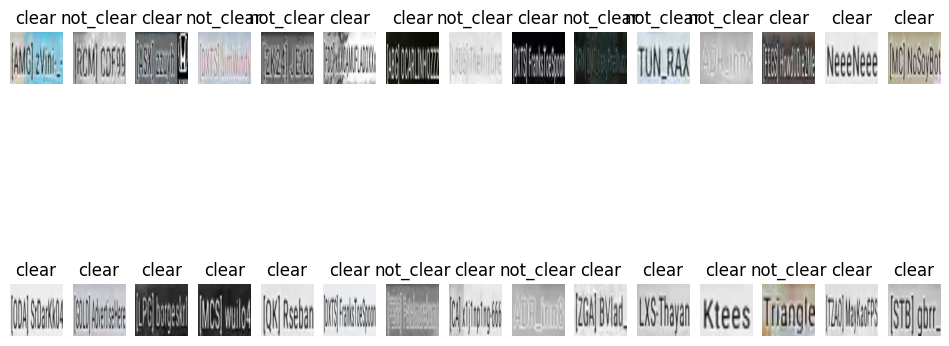

In [5]:
preview_dataset(train_dataset, 30)

In [6]:
print(train_dataset.classes)

['clear', 'not_clear']


In [7]:
with open('./pixel_filter_cls.txt', 'w') as file:
    file.write('\n'.join(train_dataset.classes))

In [8]:
model = models.resnet18(pretrained=True)
num_classes = len(train_dataset.classes)  # automatically detect number of classes
model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust final layer
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


/home/hbdesk/pubg_parser/webui/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hbdesk/pubg_parser/webui/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    # Calculate and print average loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

# Save the model checkpoint
torch.save(model.state_dict(), "pixel_filter.pth")
print("Training complete. Model saved.")

Epoch [1/50], Loss: 0.8220
Epoch [2/50], Loss: 0.4351
Epoch [3/50], Loss: 1.9689
Epoch [4/50], Loss: 0.4196
Epoch [5/50], Loss: 0.5123
Epoch [6/50], Loss: 0.1381
Epoch [7/50], Loss: 0.2094
Epoch [8/50], Loss: 0.1505
Epoch [9/50], Loss: 0.3133
Epoch [10/50], Loss: 0.0726
Epoch [11/50], Loss: 0.0204
Epoch [12/50], Loss: 0.0562
Epoch [13/50], Loss: 0.0477
Epoch [14/50], Loss: 0.0116
Epoch [15/50], Loss: 0.0332
Epoch [16/50], Loss: 0.0048
Epoch [17/50], Loss: 0.0092
Epoch [18/50], Loss: 0.0217
Epoch [19/50], Loss: 0.0047
Epoch [20/50], Loss: 0.0042
Epoch [21/50], Loss: 0.0025
Epoch [22/50], Loss: 0.0023
Epoch [23/50], Loss: 0.0020
Epoch [24/50], Loss: 0.0028
Epoch [25/50], Loss: 0.0020
Epoch [26/50], Loss: 0.0019
Epoch [27/50], Loss: 0.0031
Epoch [28/50], Loss: 0.0009
Epoch [29/50], Loss: 0.0010
Epoch [30/50], Loss: 0.0007
Epoch [31/50], Loss: 0.0010
Epoch [32/50], Loss: 0.0009
Epoch [33/50], Loss: 0.0014
Epoch [34/50], Loss: 0.0004
Epoch [35/50], Loss: 0.0007
Epoch [36/50], Loss: 0.0006
E